In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm



In [14]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
tqdm.pandas()

In [15]:
dir_root = '../data/chicago_IL/'
dir_images = '../data/chicago_IL/images'

csv_path = os.path.join(dir_root, 'df_chicago_IL_weather_merged.csv')
df_chicago = pd.read_csv(csv_path, parse_dates=True)

df_chicago['FlightDate'] = pd.to_datetime(df_chicago['FlightDate'], format='%Y-%m-%d')

# Create a target classification problem

In [5]:

df_chicago['is_delayed'] = df_chicago.progress_apply(lambda row: 1 if row['ArrDelayMinutes'] > 0 else 0, axis=1)

# df_chicago.to_csv(csv_path, index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1710564/1710564 [00:40<00:00, 42140.25it/s]


In [6]:
# Create a target classification problem

def get_delay_class(delay_mins):
    delay_class = 'Not assigned'
    if delay_mins <= 0:
        delay_class = 'on_time'
    elif 0 < delay_mins <= 15:
        delay_class = 'delay_0_15_mins'
    elif 15 < delay_mins <= 45:
        delay_class = 'delay_15_45_mins'
    elif 45 < delay_mins <= 120:
        delay_class = 'delay_45_120_mins'
    else:
        delay_class = 'delay_gte_120_mins'
    return delay_class
        

df_chicago['delay_class'] = df_chicago.progress_apply(lambda row: get_delay_class(row['ArrDelayMinutes']), axis=1)

# df_chicago.to_csv(csv_path, index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1710564/1710564 [00:48<00:00, 35398.65it/s]


# All columns of the dataset

In [9]:
list_all_columns = list(df_chicago.columns)

display(list_all_columns)

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRS

In [10]:
list_selected_features = [
 'FlightDate',
 'Airline',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrDelay',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'DistanceGroup',
 'DivAirportLandings',
 'DATE',
 'PRCP',
 'PRCP_ATTRIBUTES',
 'SNOW',
 'SNOW_ATTRIBUTES',
 'SNWD',
 'SNWD_ATTRIBUTES',
 'TMAX',
 'TMAX_ATTRIBUTES',
 'TMIN',
 'TMIN_ATTRIBUTES',
 'AWND',
 'AWND_ATTRIBUTES',
 'TAVG',
 'TAVG_ATTRIBUTES',
 'WDF2',
 'WDF2_ATTRIBUTES',
 'WDF5',
 'WDF5_ATTRIBUTES',
 'WSF2',
 'WSF2_ATTRIBUTES',
 'WSF5',
 'WSF5_ATTRIBUTES',
 'is_delayed',
 'delay_class'
]

df_chicago = df_chicago[list_selected_features].copy()

# Min and max date and total data days

In [7]:
min_date = min(df_chicago['FlightDate'])
max_date = max(df_chicago['FlightDate'])

diff = max_date - min_date

print(f"min_date: {min_date}, max_date: {max_date} \ndiff: {diff}")
display(diff)

min_date: 2018-01-01 00:00:00, max_date: 2022-07-31 00:00:00 
diff: 1672 days 00:00:00


Timedelta('1672 days 00:00:00')

# Plot quarterly delayed flights

In [17]:
dict_counts = dict(df_chicago['Year'].value_counts())
# dict_counts = sorted(dict_counts)

dict_counts

{2019: 485800, 2018: 374443, 2021: 350085, 2020: 286749, 2022: 213487}

In [37]:
def plot_quarterly_delayed_flights(df_x, col, debug=False, do_sum=False):
    list_data = []
    for year in range(2018, 2023):
        df_year = df_x[df_x['Year'] == year]
        dict_year = {}
        for quarter in range(1, 5, 1):
            cond_quarter = df_year['Quarter'] == quarter
            df_quarter = df_year[cond_quarter]

            dict_stats = dict(df_quarter[col].value_counts())
            dict_year[quarter] = dict_stats

        list_data.append((year, dict_year))
    
    if debug:
        display(list_data)
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['year', col, 'quarter']
    combined_df = combined_df.unstack([col])
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)

    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar()
    

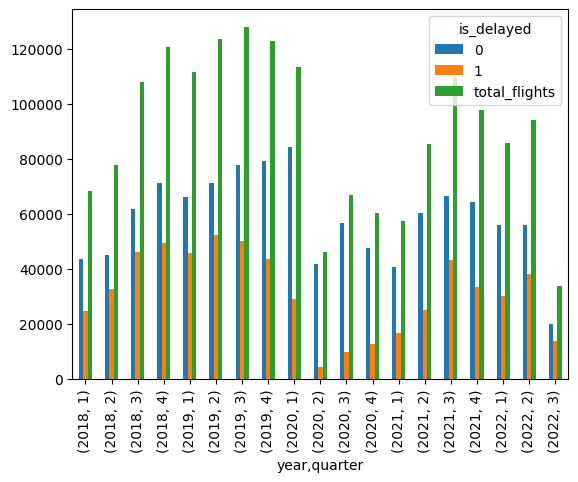

In [35]:

plot_quarterly_delayed_flights(df_chicago, 'is_delayed', do_sum=True)

In [38]:
def plot_quarterly_only_delayed_flights(df_x, col, debug=False, do_sum=False):
    df_delayed = df_x[df_x['is_delayed'] == 1]
    list_data = []
    for year in range(2018, 2023):
        df_year = df_delayed[df_delayed['Year'] == year]
        dict_year = {}
        for quarter in range(1, 5, 1):
            cond_quarter = df_year['Quarter'] == quarter
            df_quarter = df_year[cond_quarter]

            dict_stats = dict(df_quarter[col].value_counts())
            dict_year[quarter] = dict_stats

        list_data.append((year, dict_year))
    
    if debug:
        display(list_data)
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['year', col, 'quarter']
    combined_df = combined_df.unstack([col])
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)

    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar()
    

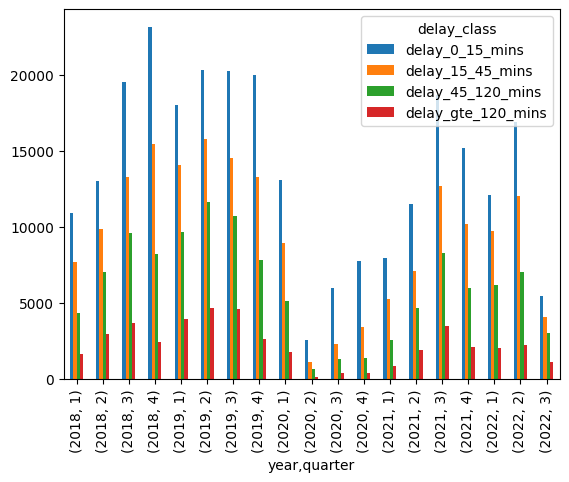

In [39]:

plot_quarterly_only_delayed_flights(df_chicago, 'delay_class')

# Plot cancelled flights

In [62]:
def plot_quarterly_cancelled_flights(df_x, col, debug=False, do_sum=False, max_val = 12500):
    list_data = []
    for year in range(2018, 2023):
        df_year = df_x[df_x['Year'] == year]
        dict_year = {}
        for quarter in range(1, 5, 1):
            cond_quarter = df_year['Quarter'] == quarter
            df_quarter = df_year[cond_quarter]

            dict_stats = dict(df_quarter[col].value_counts())
            if debug:
                print(dict_stats)
            
            # Capping max_value
            dict_stats[0] = min(max_val, dict_stats.get(0, 0))
            
            dict_year[quarter] = dict_stats

        list_data.append((year, dict_year))
    
    if debug:
        display(list_data)
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['year', col, 'quarter']
    combined_df = combined_df.unstack([col])
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)

    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar()
    

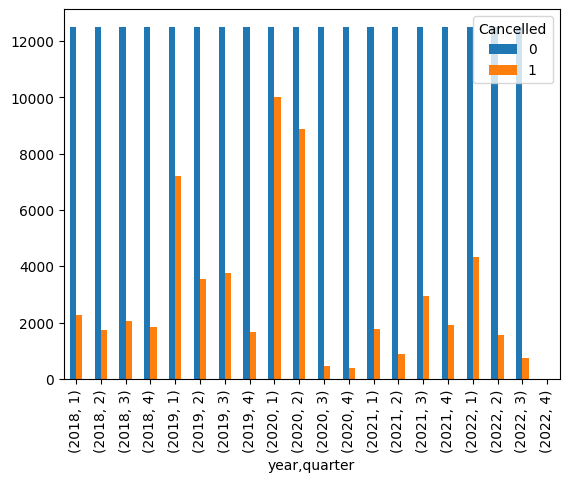

In [63]:

plot_quarterly_cancelled_flights(df_chicago, 'Cancelled', max_val=12500)

# Diverted Flights

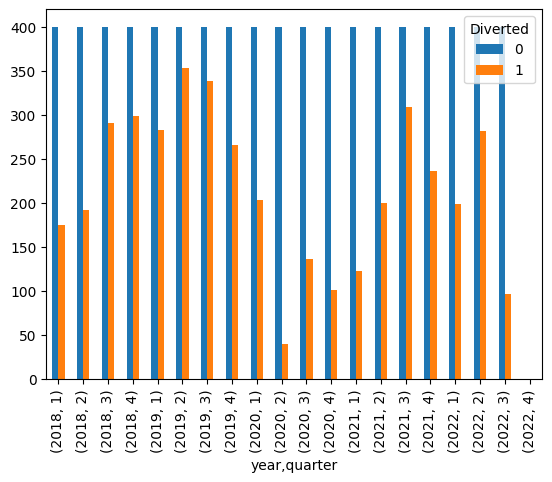

In [65]:

plot_quarterly_cancelled_flights(df_chicago, 'Diverted', max_val=400)

# Top N cities 

In [71]:

def get_top_n_cities(df_x, n_cities, debug=True):
    df_city = df_x.groupby(['DestCityName']).size().reset_index().rename(columns={0: 'count'})
    df_city = df_city.sort_values(by='count', ascending=False)
    
    if debug:
        display(df_city.head(n_cities).reset_index())
        
    return list(df_city.head(n_cities)['DestCityName'])
    


In [72]:
num_cities = 10
list_top_cities = get_top_n_cities(df_chicago, num_cities)

,index,DestCityName,count
0,132,"New York, NY",61840
1,195,"Washington, DC",43763
2,8,"Atlanta, GA",41844
3,47,"Denver, CO",38857
4,121,"Minneapolis, MN",38732
5,109,"Los Angeles, CA",35102
6,49,"Detroit, MI",32984
7,147,"Phoenix, AZ",31633
8,19,"Boston, MA",31365
9,103,"Las Vegas, NV",31364


In [87]:
def plot_top_city_flights(df_x, list_cities, col, debug=False, do_sum=False, max_val=5000, diverted_only=True):
    if diverted_only:
        df_delayed = df_x[df_x['is_delayed'] == 1]
        
    list_data = []
    for city in list_cities:
        df_city = df_x[df_x['DestCityName'] == city]
        dict_city = {}
        
        for year in range(2018, 2023, 1):
            df_year = df_city[df_city['Year'] == year]

            dict_stats = dict(df_year[col].value_counts())
            if debug:
                print(dict_stats)
            
            # Capping max_value
            dict_stats['on_time'] = min(max_val, dict_stats.get('on_time', 0))
            
            dict_city[year] = dict_stats

        list_data.append((city, dict_city))
    
    if debug:
        display(list_data)
        
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['city', col, 'year']
    combined_df = combined_df.unstack([col])
    
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)
    
    fig, axes = plt.subplots(1,1, figsize=(10, 5))
    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar(ax=axes)
    

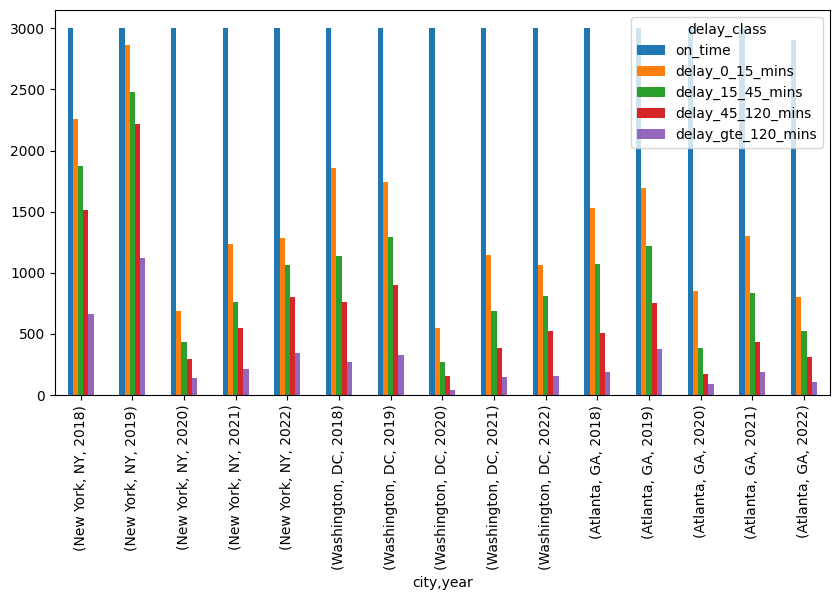

In [89]:

num_cities = 3
list_top_cities = get_top_n_cities(df_chicago, num_cities, debug=False)
plot_top_city_flights(df_chicago, list_top_cities, 'delay_class', max_val=3000)

# Analyze the NY data

In [92]:
dest_city = 'New York, NY'

df_dest_city = df_chicago[df_chicago['DestCityName'] == dest_city]



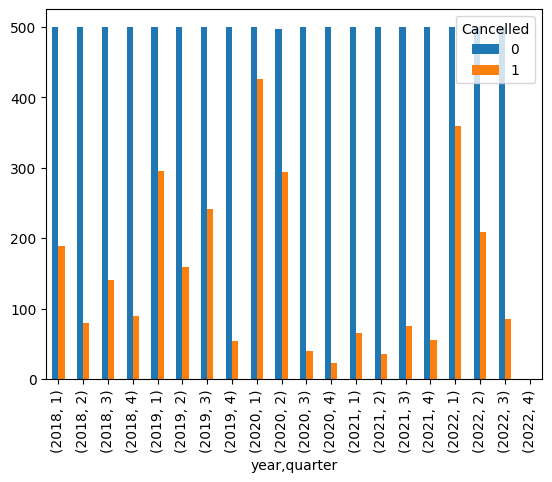

In [94]:

plot_quarterly_cancelled_flights(df_dest_city, 'Cancelled', max_val=500)

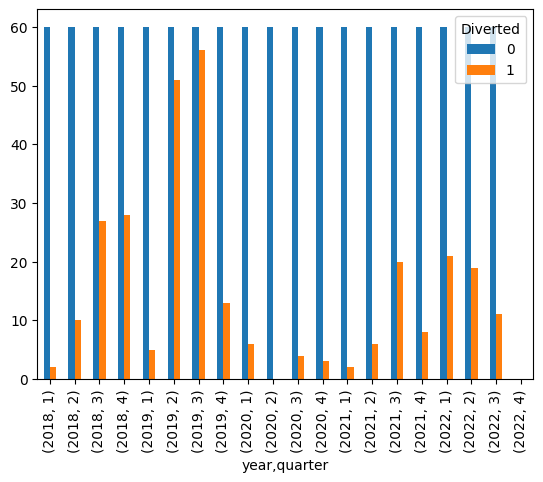

In [101]:

plot_quarterly_cancelled_flights(df_dest_city, 'Diverted', max_val=60)

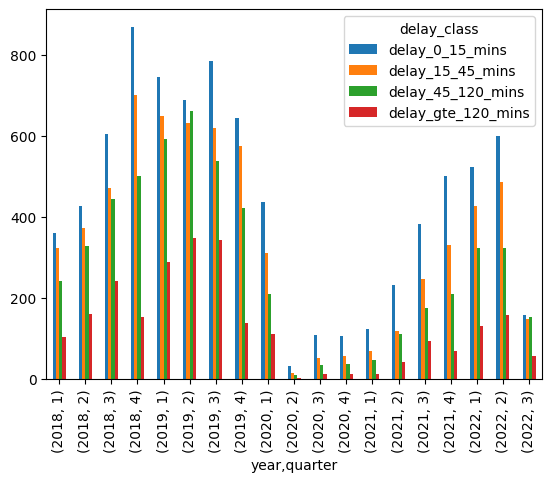

In [97]:

plot_quarterly_only_delayed_flights(df_dest_city, 'delay_class')

# Save city data

In [104]:
list_city_cols = [
 'FlightDate',
 'Airline',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrDelay',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'DistanceGroup',
 'DivAirportLandings',
 'DATE',
 'PRCP',
 'PRCP_ATTRIBUTES',
 'SNOW',
 'SNOW_ATTRIBUTES',
 'SNWD',
 'SNWD_ATTRIBUTES',
 'TMAX',
 'TMAX_ATTRIBUTES',
 'TMIN',
 'TMIN_ATTRIBUTES',
 'AWND',
 'AWND_ATTRIBUTES',
 'TAVG',
 'TAVG_ATTRIBUTES',
 'WDF2',
 'WDF2_ATTRIBUTES',
 'WDF5',
 'WDF5_ATTRIBUTES',
 'WSF2',
 'WSF2_ATTRIBUTES',
 'WSF5',
 'WSF5_ATTRIBUTES',
 'is_delayed',
 'delay_class'
]

df_dest_city = df_dest_city[list_city_cols]

dest_city_csv_path = os.path.join(dir_root, f'df_chicago_IL_{dest_city}.csv')

df_dest_city.to_csv(dest_city_csv_path, index=False)

# Count Fleet data

In [120]:
def plot_fleet(df_x, list_cities, debug=False, do_sum=False, max_val=5000, diverted_only=True):
    if diverted_only:
        df_delayed = df_x[df_x['is_delayed'] == 1]
        
    list_data = []
    list_airlines = list(df_x['Airline'].unique())
    
    for city in list_cities:
        df_city = df_x[df_x['DestCityName'] == city]
        dict_city = {}
        
        for airline in list_airlines:
            df_airline = df_city[df_city['Airline'] == airline]
            dict_stats = {}
            
            dict_stats['uniq_tail_nums'] = len(list(df_airline['Tail_Number'].unique()))
            dict_stats['uniq_mkt_nums'] = len(list(df_airline['Flight_Number_Marketing_Airline'].unique()))

            if debug:
                print(dict_stats)

                # Capping max_value
                # dict_stats['on_time'] = min(max_val, dict_stats.get('on_time', 0))
            
            if dict_stats['uniq_tail_nums'] > 100:
                dict_city[airline] = dict_stats

        list_data.append((city, dict_city))
    
    if debug:
        display(list_data)
        
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['city', 'stats', 'airline']
    combined_df = combined_df.unstack(['stats'])
    
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)
    
    fig, axes = plt.subplots(1,1, figsize=(10, 5))
    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar(ax=axes)
    

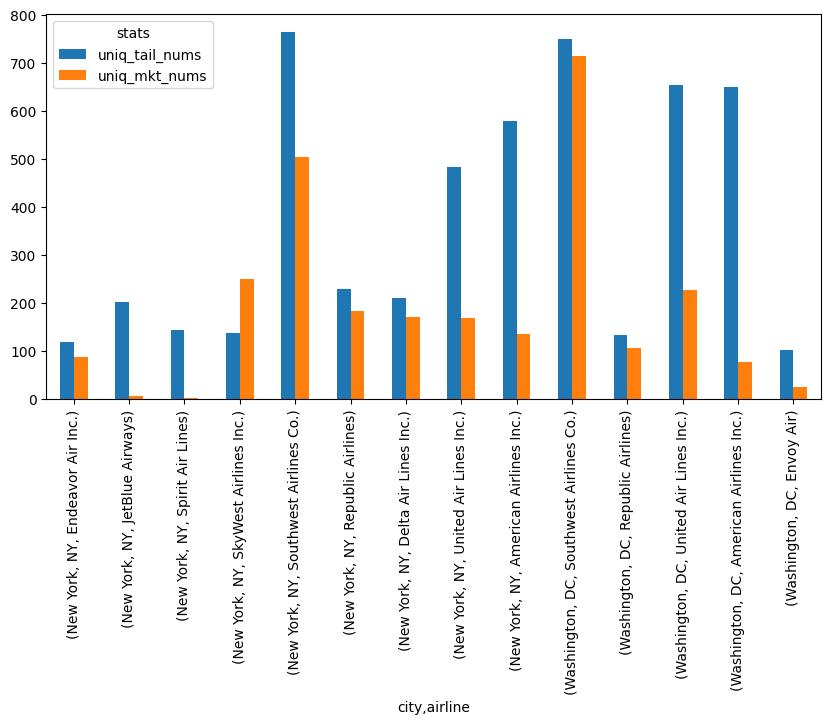

In [121]:
plot_fleet(df_chicago, list_top_cities[:2])

# City Diverted versus Delays

In [103]:
df_diverted = df_dest_city[df_dest_city['Diverted'] == 1]

df_diverted = df_diverted[list_div_cols]

df_div_delayed

,FlightDate,Airline,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Flight_Number_Marketing_Airline,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,AWND,AWND_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,is_delayed,delay_class
25430,2018-10-09,United Air Lines Inc.,LGA,0,1,2021,2257.0,156,156.0,NaN,0,NaN,129.0,NaN,733.0,2018,4,10,9,2,UA,2422,UA,N26226,2422,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,10.0,2000-2059,12.0,2309.0,NaN,NaN,2330,NaN,NaN,NaN,2300-2359,3,1.0,2018-10-09,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",294.0,",,W",211.0,",,W",46.0,",,W",246.0,"H,,S",160.0,",,W",200.0,",,W",94.0,",,W",130.0,",,W",0,on_time
36792,2018-10-07,United Air Lines Inc.,LGA,0,1,2021,2133.0,72,72.0,NaN,0,NaN,129.0,NaN,733.0,2018,4,10,7,7,UA,2422,UA,N13227,2422,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,4.0,2000-2059,122.0,2335.0,NaN,NaN,2330,NaN,NaN,NaN,2300-2359,3,1.0,2018-10-07,132.0,",,W,2400",0.0,",,W",0.0,",,W,2400",172.0,",,W",139.0,",,W",47.0,",,W",144.0,"H,,S",30.0,",,W",40.0,",,W",76.0,",,W",98.0,",,W",0,on_time
45672,2018-10-02,Delta Air Lines Inc.,LGA,0,1,1930,1924.0,0,-6.0,1420.0,0,NaN,139.0,NaN,733.0,2018,4,10,2,2,DL,2338,DL,N945AT,2338,12953,1295304,31703,"New York, NY",NY,36,New York,22,0.0,-1.0,1900-1959,28.0,1952.0,1416.0,4.0,2249,NaN,NaN,NaN,2200-2259,3,1.0,2018-10-02,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",194.0,",,W",144.0,",,W",23.0,",,W",167.0,"H,,S",300.0,",,W",290.0,",,W",67.0,",,W",94.0,",,W",0,on_time
46648,2018-10-02,Spirit Air Lines,LGA,0,1,1743,1830.0,47,47.0,NaN,0,NaN,137.0,NaN,733.0,2018,4,10,2,2,NK,630,NK,N668NK,630,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,3.0,1700-1759,35.0,1905.0,NaN,NaN,2100,NaN,NaN,NaN,2100-2159,3,1.0,2018-10-02,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",194.0,",,W",144.0,",,W",23.0,",,W",167.0,"H,,S",300.0,",,W",290.0,",,W",67.0,",,W",94.0,",,W",0,on_time
52847,2018-10-02,United Air Lines Inc.,LGA,0,1,1900,1855.0,0,-5.0,230.0,0,NaN,131.0,NaN,733.0,2018,4,10,2,2,UA,1823,UA,N27722,1823,12953,1295304,31703,"New York, NY",NY,36,New York,22,0.0,-1.0,1900-1959,31.0,1926.0,226.0,4.0,2211,NaN,NaN,NaN,2200-2259,3,1.0,2018-10-02,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",194.0,",,W",144.0,",,W",23.0,",,W",167.0,"H,,S",300.0,",,W",290.0,",,W",67.0,",,W",94.0,",,W",0,on_time
62261,2018-10-05,American Airlines Inc.,LGA,0,1,2030,2129.0,59,59.0,NaN,0,NaN,130.0,NaN,733.0,2018,4,10,5,5,AA,357,AA,N952NN,357,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,3.0,2000-2059,27.0,2156.0,NaN,NaN,2340,NaN,NaN,NaN,2300-2359,3,1.0,2018-10-05,315.0,",,W,2400",0.0,",,W",0.0,",,W,2400",183.0,",,W",122.0,",,W",32.0,",,W",141.0,"H,,S",130.0,",,W",120.0,",,W",72.0,",,W",98.0,",,W",0,on_time
62263,2018-10-07,American Airlines Inc.,LGA,0,1,2030,2123.0,53,53.0,NaN,0,NaN,130.0,NaN,733.0,2018,4,10,7,7,AA,357,AA,N824NN,357,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,3.0,2000-2059,119.0,2322.0,NaN,NaN,2340,NaN,NaN,NaN,2300-2359,3,1.0,2018-10-07,132.0,",,W,2400",0.0,",,W",0.0,",,W,2400",172.0,",,W",139.0,",,W",47.0,",,W",144.0,"H,,S",30.0,",,W",40.0,",,W",76.0,",,W",98.0,",,W",0,on_time
65144,2018-10-02,SkyWest Airlines Inc.,LGA,0,1,1730,1722.0,0,-8.0,NaN,0,NaN,128.0,NaN,733.0,2018,4,10,2,2,DL,3652,OO,N273SY,3652,12953,1295304,31703,"New York, NY",NY,36,New York,22,0.0,-1.0,1700-1759,17.0,1739.0,NaN,NaN,2038,NaN,NaN,NaN,2000-2059,3,1.0,2018-10-02,3.0,",,W,

In [23]:

def get_dest_city_stats(df_x, airline, dest_city):
    cond_airline = df_x['Airline'].isin(airline)
    cond_dest_city = df_x['DestCityName'].isin(dest_city)
    
    cond_combined = cond_airline & cond_dest_city
    
    df_temp = df_x[cond_combined].copy()
    
    return df_temp

In [24]:
airline_x = list(df_chicago['Airline'].unique())
dest_city_x = ['New York, NY']


df_dest_newyork = get_dest_city_stats(df_chicago, airline_x, dest_city_x)
df_dest_newyork

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,DestAirportID,DestCityName,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,TAVG,WDF2,WDF5,WSF2,WSF5,is_delayed
286,2018-03-17,Southwest Airlines Co.,MDW,LGA,0,0,745,752.0,7,7.0,1044.0,0,95.0,125.0,112.0,725,12953,"New York, NY",0.0,0.0,0700-0759,11.0,803.0,1038.0,6.0,1050,-6.0,0.0,-1.0,1000-1059,3,0,0,0,0,78,-10,45,29,40,50.0,89,107.0,0
287,2018-03-24,Southwest Airlines Co.,MDW,LGA,0,0,745,743.0,0,-2.0,1034.0,0,94.0,125.0,111.0,725,12953,"New York, NY",0.0,-1.0,0700-0759,9.0,752.0,1026.0,8.0,1050,-16.0,0.0,-2.0,1000-1059,3,0,0,0,0,44,0,78,20,90,90.0,125,170.0,0
288,2018-03-31,Southwest Airlines Co.,MDW,LGA,0,0,745,743.0,0,-2.0,1030.0,0,92.0,125.0,107.0,725,12953,"New York, NY",0.0,-1.0,0700-0759,11.0,754.0,1026.0,4.0,1050,-20.0,0.0,-2.0,1000-1059,3,0,23,0,0,144,0,71,67,210,210.0,134,179.0,0
586,2018-08-18,Southwest Airlines Co.,MDW,LGA,0,0,2005,2016.0,11,11.0,2304.0,0,91.0,125.0,108.0,725,12953,"New York, NY",0.0,0.0,2000-2059,10.0,2026.0,2257.0,7.0,2310,-6.0,0.0,-1.0,2300-2359,3,0,0,0,0,267,211,38,241,30,20.0,72,89.0,0
587,2018-08-11,Southwest Airlines Co.,MDW,LGA,0,0,2005,2026.0,21,21.0,2321.0,11,97.0,125.0,115.0,725,12953,"New York, NY",1.0,1.0,2000-2059,14.0,2040.0,2317.0,4.0,2310,11.0,0.0,0.0,2300-2359,3,0,0,0,0,311,200,21,249,20,30.0,94,103.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047670,2019-10-29,American Airlines Inc.,ORD,JFK,0,0,1144,1153.0,9,9.0,1447.0,0,94.0,135.0,114.0,740,12478,"New York, NY",0.0,0.0,1100-1159,12.0,1205.0,1439.0,8.0,1459,-12.0,0.0,-1.0,1400-1459,3,0,38,0,0,72,17,37,46,350,340.0,107,139.0,0
1047671,2019-10-30,American Airlines Inc.,ORD,JFK,0,0,1144,1221.0,37,37.0,1537.0,38,97.0,135.0,136.0,740,12478,"New York, NY",1.0,2.0,1100-1159,24.0,1245.0,1522.0,15.0,1459,38.0,1.0,2.0,1400-1459,3,0,157,30,30,50,0,55,25,10,20.0,103,130.0,1
1047672,2019-10-31,American Airlines Inc.,ORD,JFK,0,0,1144,1153.0,9,9.0,1601.0,62,107.0,135.0,188.0,740,12478,"New York, NY",0.0,0.0,1100-1159,72.0,1305.0,1552.0,9.0,1459,62.0,1.0,4.0,1400-1459,3,0,79,86,0,6,-38,67,8,310,310.0,112,152.0,1
1047707,2019-11-01,American Airlines Inc.,ORD,JFK,0,0,1144,1144.0,0,0.0,1444.0,0,102.0,135.0,120.0,740,12478,"New York, NY",0.0,0.0,1100-1159,10.0,1154.0,1436.0,8.0,1459,-15.0,0.0,-1.0,1400-1459,3,0,3,0,50,67,-49,43,-6,200,280.0,89,130.0,0


In [25]:
list_id_cols = ['FlightDate', 'Airline']

dict_agg = {
    "Cancelled": ['sum'], 
    "Diverted": ['sum'],
    "ArrDelayMinutes": ['sum'], 
    "is_delayed": ['count','sum']
}

list_sort_columns = [
    'FlightDate'
]

df_stats = df_dest_newyork.groupby(list_id_cols).agg(dict_agg).reset_index()
df_stats = df_stats.sort_values(by=list_sort_columns, ascending=[True for col in list_sort_columns])



In [26]:
df_stats

FlightDate                 Airline Cancelled Diverted ArrDelayMinutes  \
                                              sum      sum             sum   
0    2018-01-01       Endeavor Air Inc.         0        0              27   
1    2018-01-01         JetBlue Airways         0        0             107   
2    2018-01-01       Republic Airlines         0        0              64   
3    2018-01-01   SkyWest Airlines Inc.         0        0             354   
4    2018-01-01  Southwest Airlines Co.         0        0             662   
...         ...                     ...       ...      ...             ...   
7147 2022-07-31       Endeavor Air Inc.         0        0               8   
7148 2022-07-31         JetBlue Airways         0        0               0   
7149 2022-07-31       Republic Airlines         0        0              29   
7150 2022-07-31   SkyWest Airlines Inc.         0        0              59   
7152 2022-07-31   United Air Lines Inc.         0        0               0   

     is_delayed      
          count sum  
0             3   1  
1             2   1  
2             6   3  
3             5   3  
4             6   6  
...         ...  ..  
7147          3   1  
7148          2   0  
7149          1   1  
7150          3   1  
7152          8   0  

[7153 rows x 7 columns]

In [27]:
df_ts = df_stats.set_index('FlightDate')
df_ts

Airline Cancelled Diverted ArrDelayMinutes  \
                                         sum      sum             sum   
FlightDate                                                              
2018-01-01       Endeavor Air Inc.         0        0              27   
2018-01-01         JetBlue Airways         0        0             107   
2018-01-01       Republic Airlines         0        0              64   
2018-01-01   SkyWest Airlines Inc.         0        0             354   
2018-01-01  Southwest Airlines Co.         0        0             662   
...                            ...       ...      ...             ...   
2022-07-31       Endeavor Air Inc.         0        0               8   
2022-07-31         JetBlue Airways         0        0               0   
2022-07-31       Republic Airlines         0        0              29   
2022-07-31   SkyWest Airlines Inc.         0        0              59   
2022-07-31   United Air Lines Inc.         0        0               0   

           is_delayed      
                count sum  
FlightDate                 
2018-01-01          3   1  
2018-01-01          2   1  
2018-01-01          6   3  
2018-01-01          5   3  
2018-01-01          6   6  
...               ...  ..  
2022-07-31          3   1  
2022-07-31          2   0  
2022-07-31          1   1  
2022-07-31          3   1  
2022-07-31          8   0  

[7153 rows x 6 columns]

# Explore city data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
tqdm.pandas()

dir_root = '../data/chicago_IL/'
dir_images = '../data/chicago_IL/images'

csv_path = os.path.join(dir_root, 'df_chicago_IL_New York, NY.csv')
df_ny = pd.read_csv(csv_path, parse_dates=True)

df_ny['FlightDate'] = pd.to_datetime(df_ny['FlightDate'], format='%Y-%m-%d')

In [2]:
df_ny.head()

,FlightDate,Airline,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Flight_Number_Marketing_Airline,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,AWND,AWND_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,is_delayed,delay_class
0,2018-01-03,Endeavor Air Inc.,0,0,1045,1043.0,0,-2.0,1440.0,38,102.0,137.0,177.0,740.0,2018,1,1,3,3,DL,3394,9E,N325PQ,3394,0.0,-1.0,1000-1059,67.0,1150.0,1432.0,8.0,1402,38.0,1.0,2.0,1400-1459,3,0.0,2018-01-03,0.0,"T,,W,2400",3.0,",,W",30.0,",,W,2400",-82.0,",,W",-143.0,",,W",55.0,",,W",-114.0,"H,,S",330.0,",,W",220.0,",,W",94.0,",,W",121.0,",,W",1,delay_15_45_mins
1,2018-01-04,Endeavor Air Inc.,1,0,1045,NaN,0,NaN,NaN,0,NaN,137.0,NaN,740.0,2018,1,1,4,4,DL,3394,9E,N903XJ,3394,NaN,NaN,1000-1059,NaN,NaN,NaN,NaN,1402,NaN,NaN,NaN,1400-1459,3,0.0,2018-01-04,0.0,",,W,2400",0.0,",,W",30.0,",,W,2400",-110.0,",,W",-177.0,",,W",55.0,",,W",-139.0,"H,,S",330.0,",,W",330.0,",,W",89.0,",,W",107.0,",,W",0,on_time
2,2018-01-05,Endeavor Air Inc.,1,0,1045,NaN,0,NaN,NaN,0,NaN,137.0,NaN,740.0,2018,1,1,5,5,DL,3394,9E,N337PQ,3394,NaN,NaN,1000-1059,NaN,NaN,NaN,NaN,1402,NaN,NaN,NaN,1400-1459,3,0.0,2018-01-05,0.0,",,W,2400",0.0,",,W",30.0,",,W,2400",-116.0,",,W",-182.0,",,W",48.0,",,W",-152.0,"H,,S",320.0,",,W",330.0,",,W",89.0,",,W",103.0,",,W",0,on_time
3,2018-01-22,JetBlue Airways,0,0,1048,1043.0,0,-5.0,1342.0,0,96.0,131.0,119.0,740.0,2018,1,1,22,1,B6,906,B6,N231JB,906,0.0,-1.0,1000-1059,17.0,1100.0,1336.0,6.0,1359,-17.0,0.0,-2.0,1300-1359,3,0.0,2018-01-22,206.0,",,W,2400",0.0,",,W",0.0,",,W,2400",122.0,",,W",33.0,",,W",56.0,",,W",84.0,"H,,S",250.0,",,W",250.0,",,W",107.0,",,W",157.0,",,W",0,on_time
4,2018-01-22,JetBlue Airways,0,0,1830,1822.0,0,-8.0,2131.0,0,100.0,133.0,129.0,740.0,2018,1,1,22,1,B6,1106,B6,N229JB,1106,0.0,-1.0,1800-1859,21.0,1843.0,2123.0,8.0,2143,-12.0,0.0,-1.0,2100-2159,3,0.0,2018-01-22,206.0,",,W,2400",0.0,",,W",0.0,",,W,2400",122.0,",,W",33.0,",,W",56.0,",,W",84.0,"H,,S",250.0,",,W",250.0,",,W",107.0,",,W",157.0,",,W",0,on_time


In [54]:
df_ny_model = df_ny[df_ny['Cancelled'] == 0]

print(f"before: {df_ny.shape}, after: {df_ny_model.shape}")

before: (61840, 63), after: (58927, 63)


In [55]:
list_model_cols = [
 'Airline',
 'ArrDelayMinutes',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Flight_Number_Marketing_Airline',
 'DepTimeBlk',
 'ArrTimeBlk',
 'DistanceGroup',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'TMIN',
 'AWND',
 'TAVG',
 'is_delayed',
 'delay_class'
]

df_ny_model = df_ny_model[list_model_cols]
out_path = os.path.join(dir_root, f"df_chicago_IL_newyork_NY_fe.csv")
df_ny_model.to_csv(out_path, index=False)



# Total delay minutes

In [37]:
def plot_basic_stats(df_x):
    
    df_temp = df_x[df_x['is_delayed'] == 1]
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    sum_dep_delay_mins = sum(list(df_temp['DepDelayMinutes']))
    sum_arr_delay_mins = sum(list(df_temp['ArrDelayMinutes']))
    tot_delay_mins = sum_dep_delay_mins + sum_arr_delay_mins

    
    # -------------------------bar graph
    dict_data = {
        'Departure': sum_dep_delay_mins, 
        'Arrival': sum_arr_delay_mins,
    }
    names = list(dict_data.keys())
    values = list(dict_data.values())

    axes[1].bar(range(len(dict_data)), values, tick_label=names)
    axes[1].set_xticklabels(names) #, rotation=90)
    axes[1].set_ylabel("SumDelayMins") #, rotation=90)
    axes[1].set_title(f"tot_delay_mins: {tot_delay_mins}")
    
    # --------------------------Pie chart

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    
    dict_data = dict(df_x['delay_class'].value_counts())
    names = list(dict_data.keys())
    values = list(dict_data.values())
    
    # labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
    # sizes = [15, 30, 45, 10]
    explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    axes[2].pie(values, 
                explode=explode, 
                labels=names, 
                autopct='%1.1f%%',
                shadow=True, 
                startangle=90)
    
    axes[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # --------------------------Pie chart

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    
    dict_data = dict(df_x['Year'].value_counts())
    names = list(dict_data.keys())
    values = list(dict_data.values())
    
    # labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
    # sizes = [15, 30, 45, 10]
    explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    axes[0].pie(values, 
                explode=explode, 
                labels=names, 
                autopct='%1.1f%%',
                shadow=True, 
                startangle=90)
    
    axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.




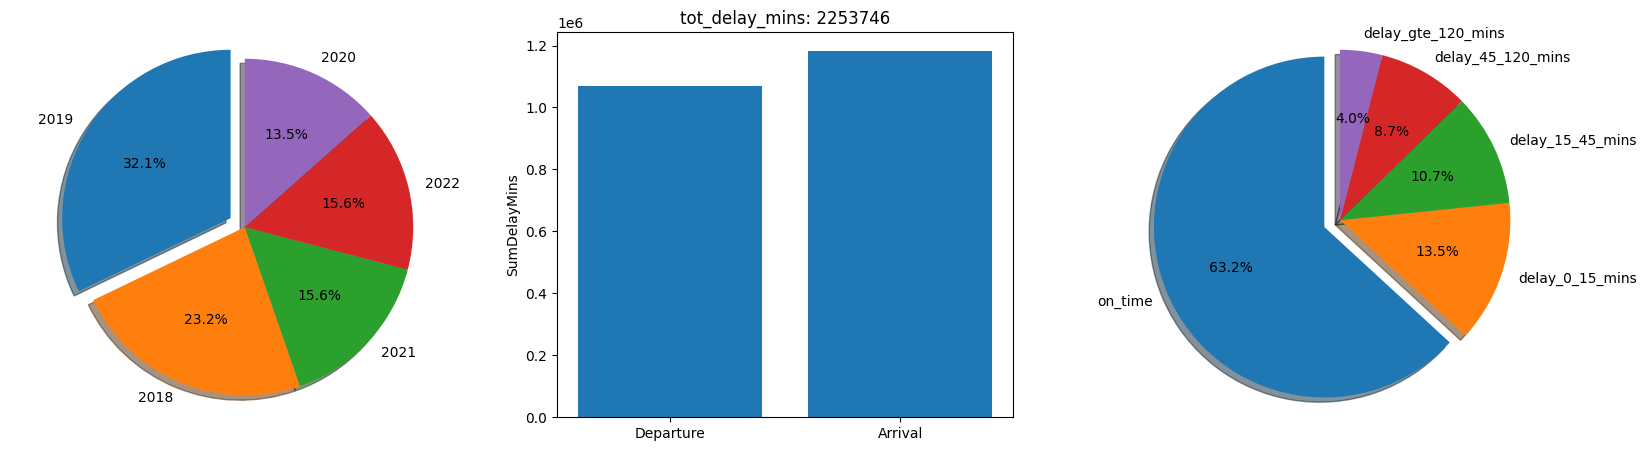

In [38]:
plot_basic_stats(df_ny)


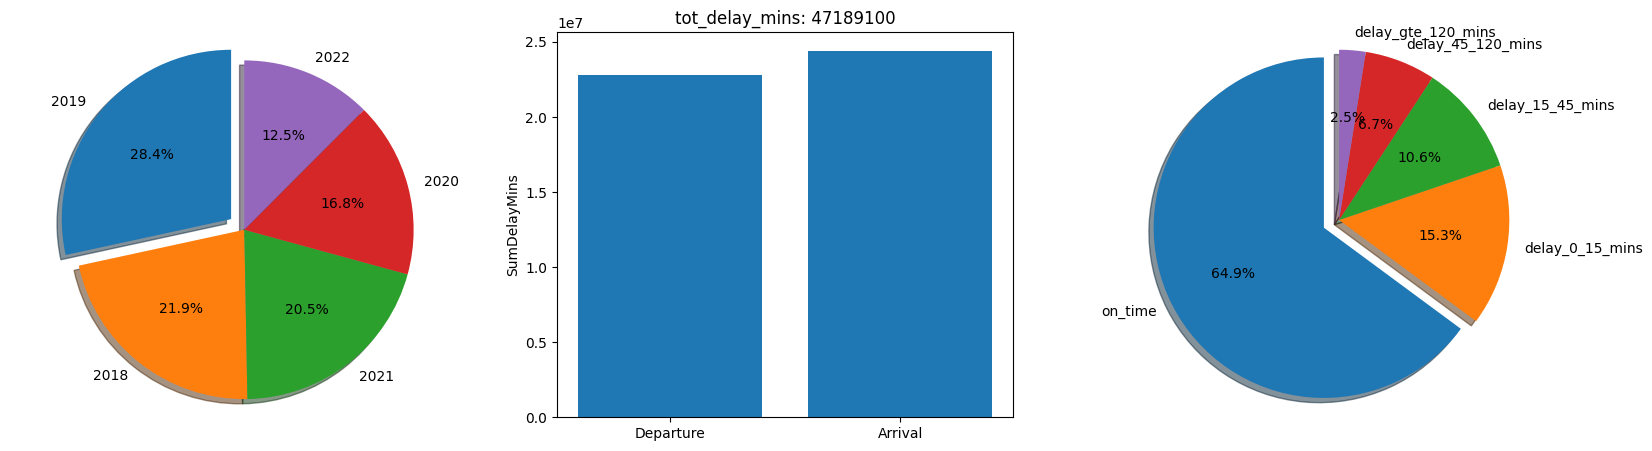

In [39]:
plot_basic_stats(df_chicago)


# Get top flight numbers

In [41]:

def get_top_n_flight_num(df_x, n_flights, debug=True):
    df_city = df_x.groupby(['Flight_Number_Marketing_Airline']).size().reset_index().rename(columns={0: 'count'})
    df_city = df_city.sort_values(by='count', ascending=False)
    
    if debug:
        display(df_city.head(n_flights).reset_index(drop=True))
        
    return list(df_city.head(n_flights)['Flight_Number_Marketing_Airline'])
    
n_flights = 5
list_top_flights = get_top_n_flight_num(df_ny, n_flights, debug=True)
list_top_flights

,Flight_Number_Marketing_Airline,count
0,906,1100
1,1106,1087
2,357,955
3,367,835
4,381,834


[906, 1106, 357, 367, 381]

In [42]:
def plot_top_flights_stats(df_x, list_flights, col, debug=False, do_sum=False, max_val=5000, diverted_only=True):
    if diverted_only:
        df_delayed = df_x[df_x['is_delayed'] == 1]
        
    list_data = []
    for flight_num in list_flights:
        df_flight = df_x[df_x['Flight_Number_Marketing_Airline'] == flight_num]
        dict_flight = {}
        
        for year in range(2018, 2023, 1):
            df_year = df_flight[df_flight['Year'] == year]

            dict_stats = dict(df_year[col].value_counts())
            if debug:
                print(dict_stats)
            
            # Capping max_value
            dict_stats['on_time'] = min(max_val, dict_stats.get('on_time', 0))
            
            dict_flight[year] = dict_stats

        list_data.append((flight_num, dict_flight))
    
    if debug:
        display(list_data)
        
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['Flight_Number_Marketing_Airline', col, 'year']
    combined_df = combined_df.unstack([col])
    
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)
    
    fig, axes = plt.subplots(1,1, figsize=(10, 5))
    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar(ax=axes)
    

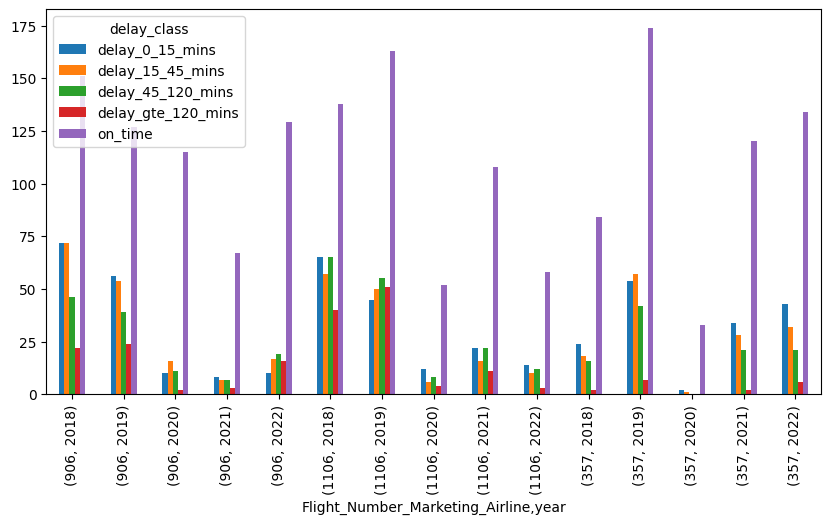

In [43]:
plot_top_flights_stats(df_ny, list_top_flights[:3], 'delay_class')

In [44]:
df_flight_906 = df_ny[df_ny['Flight_Number_Marketing_Airline'] == 906]

df_flight_906

,FlightDate,Airline,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Flight_Number_Marketing_Airline,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,AWND,AWND_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,is_delayed,delay_class
3,2018-01-22,JetBlue Airways,0,0,1048,1043.0,0,-5.0,1342.0,0,96.0,131.0,119.0,740.0,2018,1,1,22,1,B6,906,B6,N231JB,906,0.0,-1.0,1000-1059,17.0,1100.0,1336.0,6.0,1359,-17.0,0.0,-2.0,1300-1359,3,0.0,2018-01-22,206.0,",,W,2400",0.0,",,W",0.0,",,W,2400",122.0,",,W",33.0,",,W",56.0,",,W",84.0,"H,,S",250.0,",,W",250.0,",,W",107.0,",,W",157.0,",,W",0,on_time
5,2018-01-23,JetBlue Airways,0,0,1048,1123.0,35,35.0,1448.0,49,107.0,131.0,145.0,740.0,2018,1,1,23,2,B6,906,B6,N570JB,906,1.0,2.0,1000-1059,35.0,1158.0,1445.0,3.0,1359,49.0,1.0,3.0,1300-1359,3,0.0,2018-01-23,18.0,",,W,2400",13.0,",,W",0.0,",,W,2400",39.0,",,W",-21.0,",,W",57.0,",,W",19.0,"H,,S",320.0,",,W",320.0,",,W",94.0,",,W",125.0,",,W",1,delay_45_120_mins
7,2018-01-24,JetBlue Airways,0,0,1048,1138.0,50,50.0,1505.0,66,100.0,131.0,147.0,740.0,2018,1,1,24,3,B6,906,B6,N593JB,906,1.0,3.0,1000-1059,37.0,1215.0,1455.0,10.0,1359,66.0,1.0,4.0,1300-1359,3,0.0,2018-01-24,5.0,",,W,2400",8.0,",,W",30.0,",,W,2400",-10.0,",,W",-27.0,",,W",29.0,",,W",-19.0,"H,,S",340.0,",,W",260.0,",,W",58.0,",,W",72.0,",,W",1,delay_45_120_mins
9,2018-01-25,JetBlue Airways,0,0,1048,1036.0,0,-12.0,1335.0,0,94.0,131.0,119.0,740.0,2018,1,1,25,4,B6,906,B6,N197JB,906,0.0,-1.0,1000-1059,21.0,1057.0,1331.0,4.0,1359,-24.0,0.0,-2.0,1300-1359,3,0.0,2018-01-25,0.0,",,W,2400",0.0,",,W",30.0,",,W,2400",61.0,",,W",-43.0,",,W",43.0,",,W",-4.0,"H,,S",170.0,",,W",170.0,",,W",89.0,",,W",98.0,",,W",0,on_time
11,2018-01-26,JetBlue Airways,0,0,1048,1110.0,22,22.0,1409.0,10,97.0,131.0,119.0,740.0,2018,1,1,26,5,B6,906,B6,N358JB,906,1.0,1.0,1000-1059,16.0,1126.0,1403.0,6.0,1359,10.0,0.0,0.0,1300-1359,3,0.0,2018-01-26,0.0,",,W,2400",0.0,",,W",0.0,",,W,2400",106.0,",,W",6.0,",,W",83.0,",,W",50.0,"H,,S",200.0,",,W",180.0,",,W",143.0,",,W",183.0,",,W",1,delay_0_15_mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61784,2021-06-01,JetBlue Airways,0,0,1330,1357.0,27,27.0,1659.0,17,97.0,132.0,122.0,740.0,2021,2,6,1,2,B6,906,B6,N206JB,906,1.0,1.0,1300-1359,20.0,1417.0,1654.0,5.0,1642,17.0,1.0,1.0,1600-1659,3,0.0,2021-06-01,0.0,",,W,2400",0.0,",,W",0.0,",,W,2400",250.0,",,W",100.0,",,W",19.0,",,W",173.0,"H,,S",100.0,",,W",110.0,",,W",58.0,",,W",76.0,",,W",1,delay_15_45_mins
61788,2021-06-05,JetBlue Airways,0,0,1330,1324.0,0,-6.0,1634.0,0,108.0,132.0,130.0,740.0,2021,2,6,5,6,B6,906,B6,N247JB,906,0.0,-1.0,1300-1359,17.0,1341.0,1629.0,5.0,1642,-8.0,0.0,-1.0,1600-1659,3,0.0,2021-06-05,0.0,",,W,2400",0.0,",,W",0.0,",,W,2400",333.0,",,W",206.0,",,W",55.0,",,W",270.0,"H,,S",220.0,",,W",210.0,",,W",94.0,",,W",130.0,",,W",0,on_time
61789,2021-06-08,JetBlue Airways,1,0,1330,1324.0,0,-6.0,NaN,0,NaN,132.0,NaN,740.0,2021,2,6,8,2,B6,906,B6,N266JB,906,0.0,-1.0,1300-1359,NaN,NaN,NaN,NaN,1642,NaN,NaN,NaN,1600-1659,3,0.0,2021-06-08,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",328.0,",,W",217.0,",,W",19.0,",,W",253.0,"H,,S",100.0,",,W",NaN,NaN,40.0,",,W",NaN,NaN,0,on_time
61793,2021-06-02,JetBlue Airways,0,0,1330,1320.0,0,-10.0,1628.0,0,105.0,132.0,128.0,740.0,2021,2,6,2,3,B6,906,B6,N334JB,906,0.0,-1.0,1300-1359,17.0,1337.0,162

In [45]:
df_flight_906['delay_class'].value_counts()

on_time               589
delay_15_45_mins      166
delay_0_15_mins       156
delay_45_120_mins     122
delay_gte_120_mins     67
Name: delay_class, dtype: int64

In [46]:
df_flight_906['is_delayed'].value_counts()

0    589
1    511
Name: is_delayed, dtype: int64

In [47]:
df_flight_906['CRSDepTime'].value_counts()

1047    83
1023    73
1025    58
1042    57
1057    53
1215    47
1005    46
1044    40
1022    38
1110    38
1000    38
1020    37
1800    36
1330    35
1325    32
940     31
956     31
1114    29
1030    28
1048    28
1009    25
1040    25
1315    22
1008    22
943     21
1033    14
1013    12
1038    12
944     12
957     12
1027    11
1316     9
1028     9
1120     8
1053     4
1300     4
1058     3
1201     3
1039     3
1043     3
1245     2
1335     2
1305     1
1115     1
951      1
1010     1
Name: CRSDepTime, dtype: int64

In [48]:
df_flight_906['DepTimeBlk'].value_counts()

1000-1059    723
0900-0959    108
1300-1359    105
1100-1159     76
1200-1259     52
1800-1859     36
Name: DepTimeBlk, dtype: int64

In [51]:
def plot_flight_sched_times(df_x):
    
    df_temp = df_x[df_x['is_delayed'] == 1]
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    dict_data = dict(df_flight_906['DepTimeBlk'].value_counts())
    names = list(dict_data.keys())
    values = list(dict_data.values())
    
    explode = [0.1] + [0]*(len(names)-1)

    axes[0].pie(values, 
                explode=explode, 
                labels=names, 
                autopct='%1.1f%%',
                shadow=True, 
                startangle=90)
    
    axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    df_temp = df_flight_906[df_flight_906['DepTimeBlk'] == names[0]]
    dict_data = dict(df_temp['delay_class'].value_counts())
    names = list(dict_data.keys())
    values = list(dict_data.values())
    
    explode = [0.1] + [0]*(len(names)-1)

    axes[1].pie(values, 
                explode=explode, 
                labels=names, 
                autopct='%1.1f%%',
                shadow=True, 
                startangle=90)
    
    axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

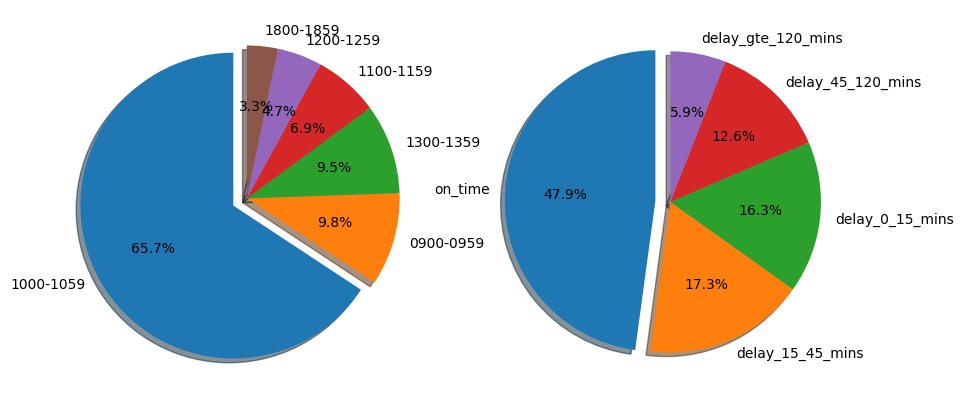

In [52]:
plot_flight_sched_times(df_flight_906)

In [19]:
list_dep_times = list(df_flight_906['CRSDepTime'].unique())
list_dep_times.sort()

list_dep_times

[940,
 943,
 944,
 951,
 956,
 957,
 1000,
 1005,
 1008,
 1009,
 1010,
 1013,
 1020,
 1022,
 1023,
 1025,
 1027,
 1028,
 1030,
 1033,
 1038,
 1039,
 1040,
 1042,
 1043,
 1044,
 1047,
 1048,
 1053,
 1057,
 1058,
 1110,
 1114,
 1115,
 1120,
 1201,
 1215,
 1245,
 1300,
 1305,
 1315,
 1316,
 1325,
 1330,
 1335,
 1800]

In [15]:
list_dep_time = [1047, 1023, 1025, 1042]

In [25]:
df_ny['DepTimeBlk'].value_counts()

1800-1859    5131
1700-1759    4839
0600-0659    4745
1400-1459    4636
1200-1259    4611
0700-0759    4609
0800-0859    4337
1000-1059    4052
1100-1159    3608
1300-1359    3552
0900-0959    3524
2000-2059    3359
1900-1959    3297
1500-1559    3234
1600-1659    3076
0001-0559     974
2100-2159     255
2200-2259       1
Name: DepTimeBlk, dtype: int64

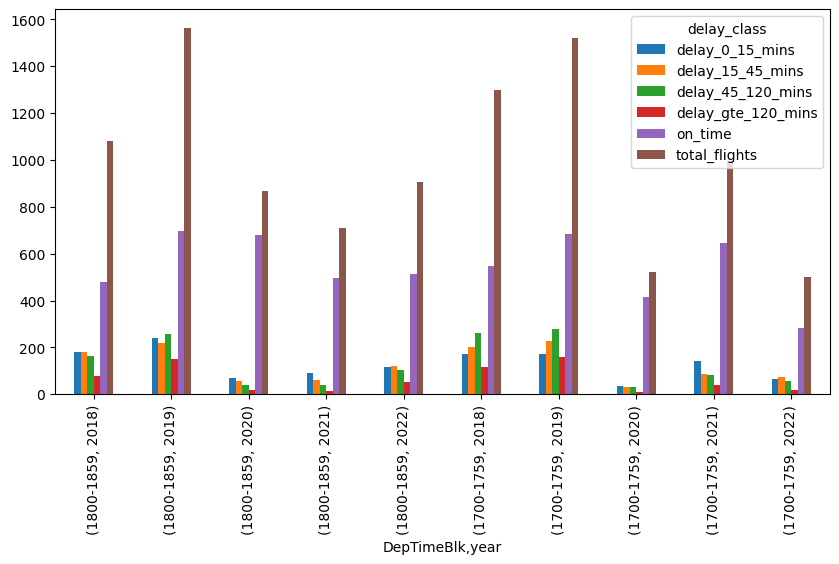

In [27]:
def plot_flight_num_stats(df_x, list_dep_time, col, debug=False, do_sum=False, max_val=5000, diverted_only=True):
    if diverted_only:
        df_delayed = df_x[df_x['is_delayed'] == 1]
        
    list_data = []
    
    for crs_dep_time in list_dep_time:
        df_crs_dep_time = df_x[df_x['DepTimeBlk'] == crs_dep_time]
        dict_crs_dep_time = {}
        
        for year in range(2018, 2023, 1):
            df_year = df_crs_dep_time[df_crs_dep_time['Year'] == year]

            dict_stats = dict(df_year[col].value_counts())
            if debug:
                print(dict_stats)
            
            # Capping max_value
            dict_stats['on_time'] = min(max_val, dict_stats.get('on_time', 0))
            
            dict_crs_dep_time[year] = dict_stats

        list_data.append((crs_dep_time, dict_crs_dep_time))
    
    if debug:
        display(list_data)
        
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['DepTimeBlk', col, 'year']
    combined_df = combined_df.unstack([col])
    
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)
    
    fig, axes = plt.subplots(1,1, figsize=(10, 5))
    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar(ax=axes)
    
list_dep_time_blks = list(df_ny['DepTimeBlk'].unique())
list_dep_time_blks = ['1800-1859','1700-1759']

plot_flight_num_stats(df_ny, list_dep_time_blks, 'delay_class', do_sum=True)

{0: 549, 1: 502}
{0: 687, 1: 562}
{0: 546, 1: 138}
{0: 439, 1: 121}
{0: 342, 1: 166}
{1: 603, 0: 479}
{1: 867, 0: 698}
{0: 680, 1: 187}
{0: 497, 1: 212}
{0: 512, 1: 396}
{0: 817, 1: 486}
{0: 1105, 1: 769}
{0: 428, 1: 99}
{0: 230, 1: 69}
{0: 436, 1: 172}
{0: 418, 1: 369}
{1: 570, 0: 563}
{0: 338, 1: 80}
{0: 250, 1: 154}
{0: 305, 1: 187}
{0: 384, 1: 263}
{0: 588, 1: 353}
{0: 420, 1: 69}
{0: 509, 1: 171}
{0: 571, 1: 280}
{0: 641, 1: 432}
{0: 935, 1: 458}
{0: 455, 1: 95}
{0: 363, 1: 151}
{0: 556, 1: 251}
{0: 361, 1: 320}
{1: 465, 0: 462}
{0: 257, 1: 85}
{0: 271, 1: 135}
{0: 380, 1: 340}
{0: 366, 1: 278}
{0: 532, 1: 500}
{0: 418, 1: 74}
{0: 567, 1: 230}
{0: 320, 1: 267}
{0: 678, 1: 321}
{0: 910, 1: 394}
{0: 539, 1: 103}
{0: 668, 1: 154}
{0: 607, 1: 235}
{1: 750, 0: 547}
{1: 838, 0: 685}
{0: 415, 1: 109}
{0: 645, 1: 350}
{0: 285, 1: 215}
{0: 759, 1: 369}
{0: 1192, 1: 420}
{0: 427, 1: 75}
{0: 698, 1: 155}
{0: 506, 1: 144}
{0: 303, 1: 91}
{0: 314, 1: 80}
{0: 81, 1: 23}
{0: 3}
{0: 65, 1: 14}
{1

[('1000-1059',
  {2018: {0: 549, 1: 502},
   2019: {0: 687, 1: 562},
   2020: {0: 546, 1: 138},
   2021: {0: 439, 1: 121},
   2022: {0: 342, 1: 166}}),
 ('1800-1859',
  {2018: {1: 603, 0: 479},
   2019: {1: 867, 0: 698},
   2020: {0: 680, 1: 187},
   2021: {0: 497, 1: 212},
   2022: {0: 512, 1: 396}}),
 ('1200-1259',
  {2018: {0: 817, 1: 486},
   2019: {0: 1105, 1: 769},
   2020: {0: 428, 1: 99},
   2021: {0: 230, 1: 69},
   2022: {0: 436, 1: 172}}),
 ('1500-1559',
  {2018: {0: 418, 1: 369},
   2019: {1: 570, 0: 563},
   2020: {0: 338, 1: 80},
   2021: {0: 250, 1: 154},
   2022: {0: 305, 1: 187}}),
 ('1100-1159',
  {2018: {0: 384, 1: 263},
   2019: {0: 588, 1: 353},
   2020: {0: 420, 1: 69},
   2021: {0: 509, 1: 171},
   2022: {0: 571, 1: 280}}),
 ('0800-0859',
  {2018: {0: 641, 1: 432},
   2019: {0: 935, 1: 458},
   2020: {0: 455, 1: 95},
   2021: {0: 363, 1: 151},
   2022: {0: 556, 1: 251}}),
 ('1600-1659',
  {2018: {0: 361, 1: 320},
   2019: {1: 465, 0: 462},
   2020: {0: 257, 1: 85

is_delayed            0      1  total_flights
DepTimeBlk year                              
1000-1059  2018   549.0  502.0         1051.0
           2019   687.0  562.0         1249.0
           2020   546.0  138.0          684.0
           2021   439.0  121.0          560.0
           2022   342.0  166.0          508.0
1800-1859  2018   479.0  603.0         1082.0
           2019   698.0  867.0         1565.0
           2020   680.0  187.0          867.0
           2021   497.0  212.0          709.0
           2022   512.0  396.0          908.0
1200-1259  2018   817.0  486.0         1303.0
           2019  1105.0  769.0         1874.0
           2020   428.0   99.0          527.0
           2021   230.0   69.0          299.0
           2022   436.0  172.0          608.0
1500-1559  2018   418.0  369.0          787.0
           2019   563.0  570.0         1133.0
           2020   338.0   80.0          418.0
           2021   250.0  154.0          404.0
           2022   305.0  187.0          492.0
1100-1159  2018   384.0  263.0          647.0
           2019   588.0  353.0          941.0
           2020   420.0   69.0          489.0
           2021   509.0  171.0          680.0
           2022   571.0  280.0          851.0
0800-0859  2018   641.0  432.0         1073.0
           2019   935.0  458.0         1393.0
           2020   455.0   95.0          550.0
           2021   363.0  151.0          514.0
           2022   556.0  251.0          807.0
1600-1659  2018   361.0  320.0          681.0
           2019   462.0  465.0          927.0
           2020   257.0   85.0          342.0
           2021   271.0  135.0          406.0
           2022   380.0  340.0          720.0
1300-1359  2018   366.0  278.0          644.0
           2019   532.0  500.0         1032.0
           2020   418.0   74.0          492.0
           2021   567.0  230.0          797.0
           2022   320.0  267.0          587.0
0700-0759  2018   678.0  321.0          999.0
           2019   910.0  394.0         1304.0
           2020   539.0  103.0          642.0
           2021   668.0  154.0          822.0
           2022   607.0  235.0          842.0
1700-1759  2018   547.0  750.0         1297.0
           2019   685.0  838.0         1523.0
           2020   415.0  109.0          524.0
           2021   645.0  350.0          995.0
           2022   285.0  215.0          500.0
0600-0659  2018   759.0  369.0         1128.0
           2019  1192.0  420.0         1612.0
           2020   427.0   75.0          502.0
           2021   698.0  155.0          853.0
           2022   506.0  144.0          650.0
0001-0559  2018   303.0   91.0          394.0
           2019   314.0   80.0          394.0
           2020    81.0   23.0          104.0
           2021     3.0    NaN            3.0
           2022    65.0   14.0           79.0
2000-2059  2018   420.0  421.0          841.0
           2019   632.0  664.0         1296.0
           2020   240.0   61.0          301.0
           2021   223.0  162.0          385.0
           2022   296.0  240.0          536.0
1900-1959  2018   317.0  353.0          670.0
           2019   486.0  557.0         1043.0
           2020   385.0   85.0          470.0
           2021   423.0  260.0          683.0
           2022   257.0  174.0          431.0
2100-2159  2018    58.0   18.0           76.0
           2019    67.0   31.0           98.0
           2020    60.0   21.0           81.0
0900-0959  2018   454.0  255.0          709.0
           2019   699.0  420.0         1119.0
           2020   542.0  112.0          654.0
           2021   456.0  152.0          608.0
           2022   273.0  161.0          434.0
1400-1459  2018   472.0  476.0          948.0
           2019   647.0  726.0         1373.0
           2020   539.0  134.0          673.0
           2021   658.0  284.0          942.0
           2022   452.0  248.0          700.0
2200-2259  2020     1.0    NaN            1.0

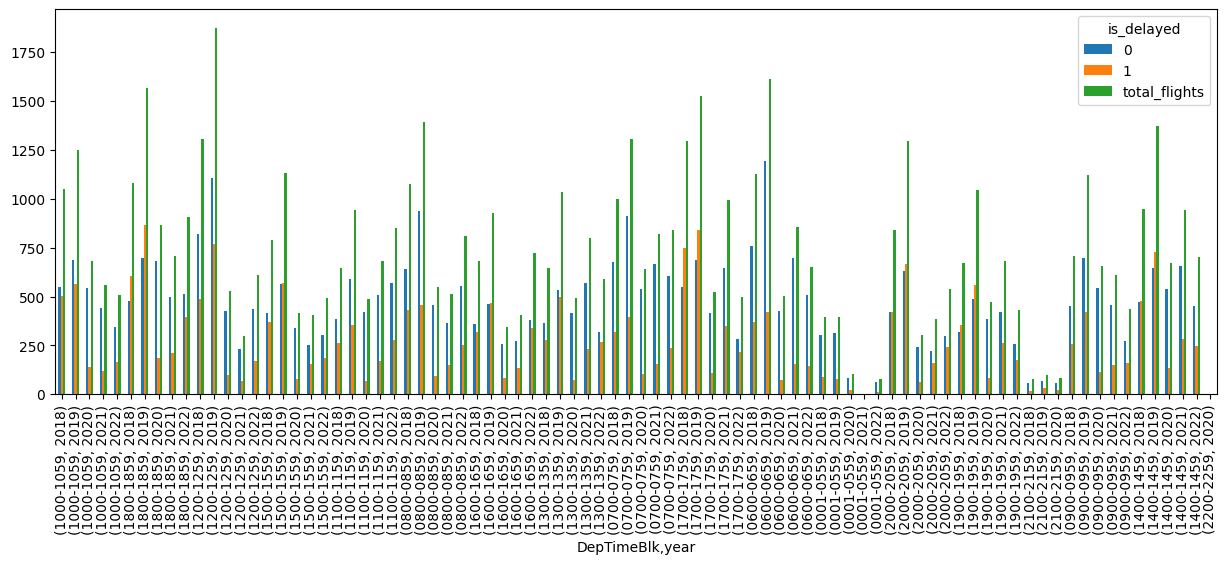

In [32]:
def plot_dep_time_blk_stats(df_x, list_dep_time, col, debug=False, do_sum=False, max_val=5000, diverted_only=True):
    if diverted_only:
        df_delayed = df_x[df_x['is_delayed'] == 1]
        
    list_data = []
    
    for crs_dep_time in list_dep_time:
        df_crs_dep_time = df_x[df_x['DepTimeBlk'] == crs_dep_time]
        dict_crs_dep_time = {}
        
        for year in range(2018, 2023, 1):
            df_year = df_crs_dep_time[df_crs_dep_time['Year'] == year]

            dict_stats = dict(df_year[col].value_counts())
            if debug:
                print(dict_stats)
            
            dict_crs_dep_time[year] = dict_stats

        list_data.append((crs_dep_time, dict_crs_dep_time))
    
    if debug:
        display(list_data)
        
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['DepTimeBlk', col, 'year']
    combined_df = combined_df.unstack([col])
    
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)
    
    fig, axes = plt.subplots(1,1, figsize=(15, 5))
    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar(ax=axes)

list_dep_time_blks = list(df_ny['DepTimeBlk'].unique())
# list_dep_time_blks = ['1800-1859','1700-1759']

plot_dep_time_blk_stats(df_ny, list_dep_time_blks, 'is_delayed', do_sum=True, debug=True)
